<a href="https://colab.research.google.com/github/H4D32/AndrewNg-ML-Python-Notebooks/blob/main/Ex2/AndrewEx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Andrew Ng Assignment 2 (Week3)

### Logistic Regression

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as op

In [ ]:
data = pd.read_csv("ex2data1.txt", header = None, names = ["Ex1_Score", "Ex2_Score", "Admitted" ])
#data = data.astype({"Admitted": str})

In [ ]:
data.head()

,Ex1_Score,Ex2_Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
data.describe()

,Ex1_Score,Ex2_Score,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
fig = px.scatter(data, x="Ex1_Score", y="Ex2_Score", symbol="Admitted", color="Admitted", template= "ggplot2")
fig.show()

In [ ]:
def sigmoid(z):
  """
  Compute the sigmoid of each value of z
  """

  return 1 / (1 + np.exp(-z))

In [ ]:
def CostFunc(theta,x,y):
    m,n = x.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    term1 = np.log(sigmoid(x.dot(theta)));
    term2 = np.log(1-sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2;
    J = -((np.sum(term))/m);
    return J;

In [ ]:
def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta))
    grad = ((x.T).dot(sigmoid_x_theta-y))/m
    return grad.flatten()

In [ ]:
X = data[["Ex1_Score", "Ex2_Score"]]
y = data[["Admitted"]]

In [ ]:
m, n = X.shape
X.insert(0,"bias",np.ones((m,1)))
initial_theta = np.zeros((n+1,1))

In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [ ]:
Result = op.minimize(fun = CostFunc, 
                                 x0 = initial_theta, 
                                 args = (X.values, y.values),
                                 method = 'TNC',
                                 jac = Gradient);
optimal_theta = Result.x;
optimal_theta

array([-25.16131878,   0.20623159,   0.20147149])

In [ ]:
x_value= np.array([np.min(X.values[:,1]),np.max(X.values[:,1])])
y_value= -(optimal_theta[0] +optimal_theta[1]*x_value)/optimal_theta[2]

In [ ]:
fig.add_trace(
    go.Scatter(
        x=x_value,
        y=y_value,
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.show()

In [ ]:
x_test = np.array([45,85])
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(optimal_theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob)

For a student with scores 45 and 85, we predict an admission probability of 0.7762906256930324


In [ ]:
data2 = pd.read_csv("ex2data2.txt", header = None, names = ["Test 1", "Test 2", "Accepted" ])

In [ ]:
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
data2.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [ ]:
fig2 = px.scatter(data2, x="Test 1", y="Test 2", symbol="Accepted", color="Accepted", template= "ggplot2")
fig2.show()

In [ ]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out



In [ ]:
X_poly = mapFeature(data2[["Test 1"]].values,data2[["Test 2"]].values,6)

In [ ]:
def CostFunc_reg(theta,x,y,L):
    m,n = x.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    term1 = np.log(sigmoid(x.dot(theta)));
    term2 = np.log(1-sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2;
    J = -((np.sum(term))/m);
    J = J + L/(2*m) * sum(theta**2)
    return J;

In [ ]:
def Gradient_reg(theta,x,y,L):
    m , n = x.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    sigmoid_x_theta = sigmoid(x.dot(theta))
    grad = ((x.T).dot(sigmoid_x_theta-y))/m
    newtheta = np.copy(theta)
    newtheta[0] = 0
    grad = grad + (L/m) * newtheta
    return grad.flatten()

In [ ]:
y2 = data2[["Accepted"]]

In [ ]:
m2, n2 = X_poly.shape
initial_theta2 = np.zeros((n2,1))

In [ ]:
Result2 = op.minimize(fun = CostFunc_reg, 
                                 x0 = initial_theta2, 
                                 args = (X_poly, y2.values, 1),
                                 method = 'TNC',
                                 jac = Gradient_reg);
optimal_theta2 = Result2.x;
optimal_theta2

array([ 1.25441462,  0.6227677 ,  1.19242753, -2.00505487, -0.87290691,
       -1.36184258,  0.12573814, -0.3553683 , -0.35603634, -0.17096321,
       -1.45784656, -0.06683331, -0.61498646, -0.25080278, -1.18096052,
       -0.22566841, -0.20562893, -0.06382343, -0.2718703 , -0.2765899 ,
       -0.46836095, -1.03247382,  0.01627584, -0.29695279,  0.0058107 ,
       -0.32631642, -0.12073372, -0.93023098])

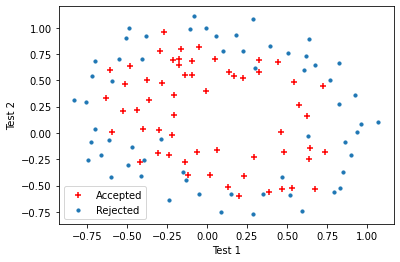

In [ ]:
XX=data2.iloc[:,:-1].values
yy=data2.iloc[:,-1].values
pos , neg = (yy==1).reshape(118,1) , (yy==0).reshape(118,1)
plt.scatter(XX[pos[:,0],0],XX[pos[:,0],1],c="r",marker="+")
plt.scatter(XX[neg[:,0],0],XX[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)


In [ ]:
XX = mapFeature(XX[:,0], XX[:,1],6)

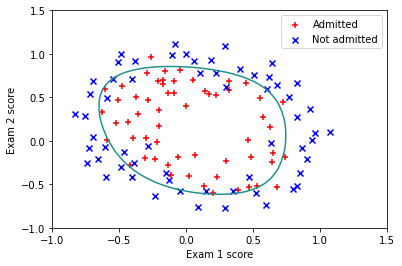

In [ ]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

plt.scatter(XX[pos[:,0],1],XX[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(XX[neg[:,0],1],XX[neg[:,0],2],c="b",marker="x",label="Not admitted")
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ optimal_theta2
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)